In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
df=pd.read_csv("/Users/shree/Desktop/House Price/notebook/House Price.csv")

In [5]:
df.head()
df.tail()

,Bedrooms,Bathrooms,SquareFootage,LocationScore,Price
495,1,3,546,7.72,250041.26
496,3,1,3859,7.44,416870.07
497,1,2,1277,5.69,215605.77
498,1,3,1539,8.40,310625.45
499,1,3,1210,4.88,244591.69


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bedrooms       500 non-null    int64  
 1   Bathrooms      500 non-null    int64  
 2   SquareFootage  500 non-null    int64  
 3   LocationScore  500 non-null    float64
 4   Price          500 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 19.7 KB


In [7]:
df.isnull().sum()

Bedrooms         0
Bathrooms        0
SquareFootage    0
LocationScore    0
Price            0
dtype: int64

In [8]:
df.describe()

,Bedrooms,Bathrooms,SquareFootage,LocationScore,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.970000,1.968000,2316.302000,5.539900,348656.483700
std,1.425891,0.817504,1041.692016,2.595169,76726.143879
min,1.000000,1.000000,510.000000,1.000000,163646.900000
25%,2.000000,1.000000,1430.250000,3.285000,290607.870000
50%,3.000000,2.000000,2357.500000,5.695000,350451.735000
75%,4.000000,3.000000,3262.750000,7.722500,399404.072500
max,5.000000,3.000000,3995.000000,9.990000,544693.250000


In [9]:
df.columns

Index(['Bedrooms', 'Bathrooms', 'SquareFootage', 'LocationScore', 'Price'], dtype='object')

In [10]:
df.dtypes

Bedrooms           int64
Bathrooms          int64
SquareFootage      int64
LocationScore    float64
Price            float64
dtype: object

array([[<Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'Bathrooms'}>],
       [<Axes: title={'center': 'SquareFootage'}>,
        <Axes: title={'center': 'LocationScore'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

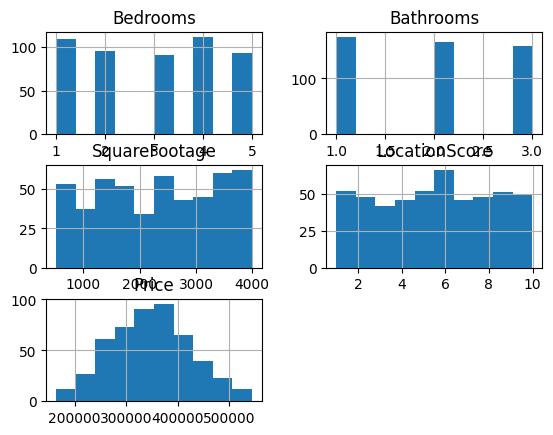

In [11]:
df.hist()

<Axes: ylabel='Price'>

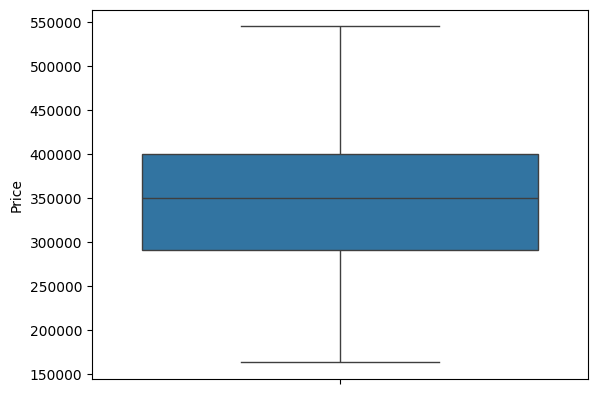

In [12]:
sns.boxplot(df['Price'])

<Axes: ylabel='Bedrooms'>

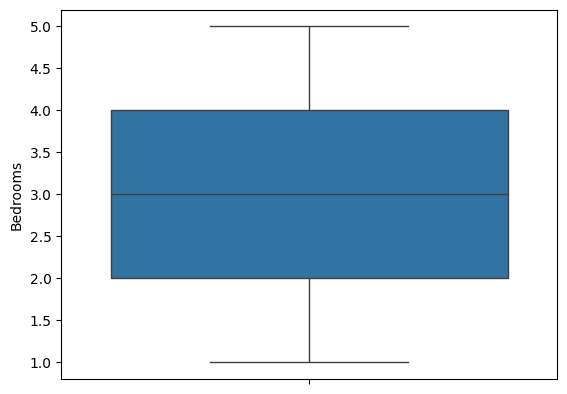

In [13]:
sns.boxplot(df['Bedrooms'])

<Axes: ylabel='LocationScore'>

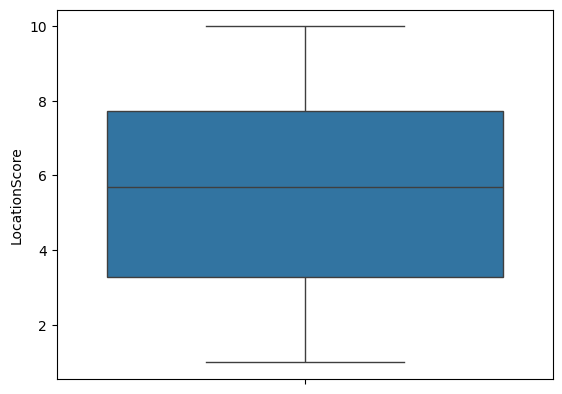

In [14]:
sns.boxplot(df['LocationScore'])

In [15]:
df.columns

Index(['Bedrooms', 'Bathrooms', 'SquareFootage', 'LocationScore', 'Price'], dtype='object')

In [16]:
X=df.drop('Price', axis=1)
y=df['Price']

In [17]:
df.dtypes

Bedrooms           int64
Bathrooms          int64
SquareFootage      int64
LocationScore    float64
Price            float64
dtype: object

In [18]:
X_train, X_test, y_train, y_test, = train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor(),
    "Gradient Boost": GradientBoostingRegressor(),
    "RandomForestRegressor": RandomForestRegressor()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results.append({
        "model": name,
        "Absolute Error": mae,
        "MSE": mse,
        "R2 Score": r2
    })
    

In [20]:
print(results)

[{'model': 'LinearRegression', 'Absolute Error': 17769.54258586047, 'MSE': 435633553.1271085, 'R2 Score': 0.927373270368339}, {'model': 'Ridge', 'Absolute Error': 17779.827685305114, 'MSE': 435978006.1114494, 'R2 Score': 0.9273158448243584}, {'model': 'Lasso', 'Absolute Error': 17769.766264798483, 'MSE': 435640177.82231516, 'R2 Score': 0.9273721659310333}, {'model': 'SVR', 'Absolute Error': 61682.72719134527, 'MSE': 5998564041.499906, 'R2 Score': -5.173084797305272e-05}, {'model': 'Decision Tree', 'Absolute Error': 29848.2889, 'MSE': 1567983438.3451788, 'R2 Score': 0.738593346572663}, {'model': 'KNN', 'Absolute Error': 53017.97605999999, 'MSE': 3872198756.183917, 'R2 Score': 0.3544456570741513}, {'model': 'Gradient Boost', 'Absolute Error': 19582.3828547594, 'MSE': 591282585.7388566, 'R2 Score': 0.9014242126619767}, {'model': 'RandomForestRegressor', 'Absolute Error': 21414.29426599999, 'MSE': 697064747.2861542, 'R2 Score': 0.8837887197312779}]


In [21]:
for row in results:
    print(row)

{'model': 'LinearRegression', 'Absolute Error': 17769.54258586047, 'MSE': 435633553.1271085, 'R2 Score': 0.927373270368339}
{'model': 'Ridge', 'Absolute Error': 17779.827685305114, 'MSE': 435978006.1114494, 'R2 Score': 0.9273158448243584}
{'model': 'Lasso', 'Absolute Error': 17769.766264798483, 'MSE': 435640177.82231516, 'R2 Score': 0.9273721659310333}
{'model': 'SVR', 'Absolute Error': 61682.72719134527, 'MSE': 5998564041.499906, 'R2 Score': -5.173084797305272e-05}
{'model': 'Decision Tree', 'Absolute Error': 29848.2889, 'MSE': 1567983438.3451788, 'R2 Score': 0.738593346572663}
{'model': 'KNN', 'Absolute Error': 53017.97605999999, 'MSE': 3872198756.183917, 'R2 Score': 0.3544456570741513}
{'model': 'Gradient Boost', 'Absolute Error': 19582.3828547594, 'MSE': 591282585.7388566, 'R2 Score': 0.9014242126619767}
{'model': 'RandomForestRegressor', 'Absolute Error': 21414.29426599999, 'MSE': 697064747.2861542, 'R2 Score': 0.8837887197312779}


In [22]:
for row in results:
    print(' '.join(f"{k}: {v:.2f}" if isinstance(v, (int, float)) else f"{k}: {v}" for k, v in row.items()))


model: LinearRegression Absolute Error: 17769.54 MSE: 435633553.13 R2 Score: 0.93
model: Ridge Absolute Error: 17779.83 MSE: 435978006.11 R2 Score: 0.93
model: Lasso Absolute Error: 17769.77 MSE: 435640177.82 R2 Score: 0.93
model: SVR Absolute Error: 61682.73 MSE: 5998564041.50 R2 Score: -0.00
model: Decision Tree Absolute Error: 29848.29 MSE: 1567983438.35 R2 Score: 0.74
model: KNN Absolute Error: 53017.98 MSE: 3872198756.18 R2 Score: 0.35
model: Gradient Boost Absolute Error: 19582.38 MSE: 591282585.74 R2 Score: 0.90
model: RandomForestRegressor Absolute Error: 21414.29 MSE: 697064747.29 R2 Score: 0.88


In [23]:
df.columns


Index(['Bedrooms', 'Bathrooms', 'SquareFootage', 'LocationScore', 'Price'], dtype='object')

In [24]:
import joblib

# Example: Fit a model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model to a .pkl file
joblib.dump(model, 'linear_model.pkl')

['linear_model.pkl']

In [25]:
df.describe()

,Bedrooms,Bathrooms,SquareFootage,LocationScore,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.970000,1.968000,2316.302000,5.539900,348656.483700
std,1.425891,0.817504,1041.692016,2.595169,76726.143879
min,1.000000,1.000000,510.000000,1.000000,163646.900000
25%,2.000000,1.000000,1430.250000,3.285000,290607.870000
50%,3.000000,2.000000,2357.500000,5.695000,350451.735000
75%,4.000000,3.000000,3262.750000,7.722500,399404.072500
max,5.000000,3.000000,3995.000000,9.990000,544693.250000


In [38]:
import statistics
average=statistics.mean(df["Price"])
print(average)

348656.4837


In [40]:
mode=statistics.mode(df['Bedrooms'])
print(mode)

4
